# Deep Learning入門

## LSTM のサンプル

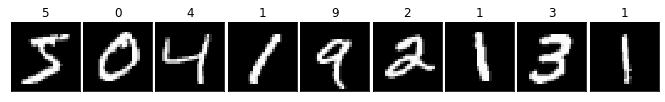

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LSTM, Activation, Bidirectional, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot, to_categorical

%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,
                    top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')

## 前処理

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

# 名義尺度の値をone-hot表現へ変換
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## モデル作成

In [6]:
# Sequential: ネットワークを1列に積み上げているシンプルな方法
model = Sequential()

model.add(Bidirectional(LSTM(128), input_shape=(28, 28)))
model.add(Dense(10, kernel_initializer='glorot_uniform'))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    # optimizer='sgd',
    # 最適化手法として Adam を使用している。
    optimizer=Adam(),
    metrics=['acc']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               160768    
_________________________________________________________________
dense (Dense)                (None, 10)                2570      
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 163,338
Trainable params: 163,338
Non-trainable params: 0
_________________________________________________________________


## モデル可視化

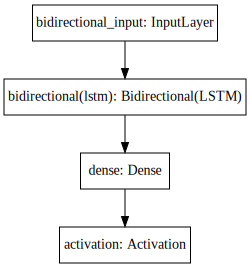

In [7]:
SVG(model_to_dot(model, dpi=72).create(prog='dot', format='svg'))

## モデル学習

In [8]:
history = model.fit(
    x_train, y_train,
    batch_size=200, epochs=20, verbose=1,
    validation_data=(x_test, y_test),
    # 早期終了: 検証データの誤差が大きくなってきた（或いは評価関数値が下がってきた）ところで学習をストップさせる
    callbacks=[EarlyStopping(patience=0, verbose=1)]
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 103s 2ms/sample - loss: 0.4485 - acc: 0.8640 - val_loss: 0.2054 - val_acc: 0.9335
Epoch 2/20
60000/60000 [==============================] - 55s 913us/sample - loss: 0.1700 - acc: 0.9467 - val_loss: 0.1624 - val_acc: 0.9498
Epoch 3/20
60000/60000 [==============================] - 55s 911us/sample - loss: 0.1318 - acc: 0.9584 - val_loss: 0.1435 - val_acc: 0.9534
Epoch 4/20
60000/60000 [==============================] - 54s 907us/sample - loss: 0.1098 - acc: 0.9641 - val_loss: 0.1418 - val_acc: 0.9550
Epoch 5/20
60000/60000 [==============================] - 56s 928us/sample - loss: 0.0943 - acc: 0.9691 - val_loss: 0.1285 - val_acc: 0.9587
Epoch 6/20
60000/60000 [==============================] - 54s 908us/sample - loss: 0.0816 - acc: 0.9728 - val_loss: 0.1124 - val_acc: 0.9639
Epoch 7/20
60000/60000 [==============================] - 53s 889us/sample - loss: 0.0708 - acc: 0.9768 -

## モデル評価

Test loss: 0.11729486039467156
Test accuracy: 0.9627


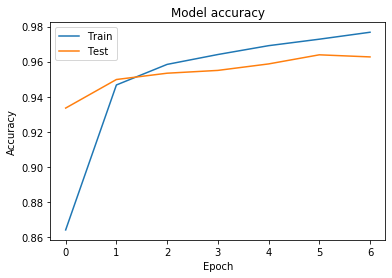

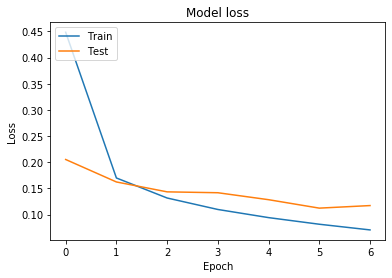

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()